<a href="https://colab.research.google.com/github/tpcorreia/MyNotes_Bizu/blob/EDA/EDA_My_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading requiered modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
#Downloading the dataset
url = "/content/adult.data"

columns = ["age" , "work-class" , "fnlwgt", "education", "education-num" , "marital-status",
           "occupation", "relationship" , "race" , "sex" , "capital-gain" , "capital-loss",
           "hours-per-week" , "native-county" , "income"]

data = pd.read_csv(url, names=columns, sep=',', na_values='?', skipinitialspace = True)


In [ ]:
#Taking a look into our data set

print(data.head())
data.info()

In [17]:
# Another way and better way to check .info()
# Get column information
info_data = {
    "Column": data.columns,
    "Non-Null Count": data.notnull().sum(),
    "Null Count": data.isnull().sum(),
    "Dtype": data.dtypes
}

# Create a DataFrame from the column information
info_df = pd.DataFrame(info_data)

# Sort by Dtype
sorted_info_df = info_df.sort_values(by='Dtype')

# Print the sorted information
print(sorted_info_df)

                        Column  Non-Null Count  Null Count   Dtype
age                        age           32561           0   int64
fnlwgt                  fnlwgt           32561           0   int64
education-num    education-num           32561           0   int64
capital-gain      capital-gain           32561           0   int64
capital-loss      capital-loss           32561           0   int64
hours-per-week  hours-per-week           32561           0   int64
work-class          work-class           30725        1836  object
education            education           32561           0  object
marital-status  marital-status           32561           0  object
occupation          occupation           30718        1843  object
relationship      relationship           32561           0  object
race                      race           32561           0  object
sex                        sex           32561           0  object
native-county    native-county           31978         583  ob

In [16]:
# Check basic statistics for the attributes - e.g., counts, percentiles,
# mean, median, standard deviation.
# The statistics should be relevant for the type of attribute.
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

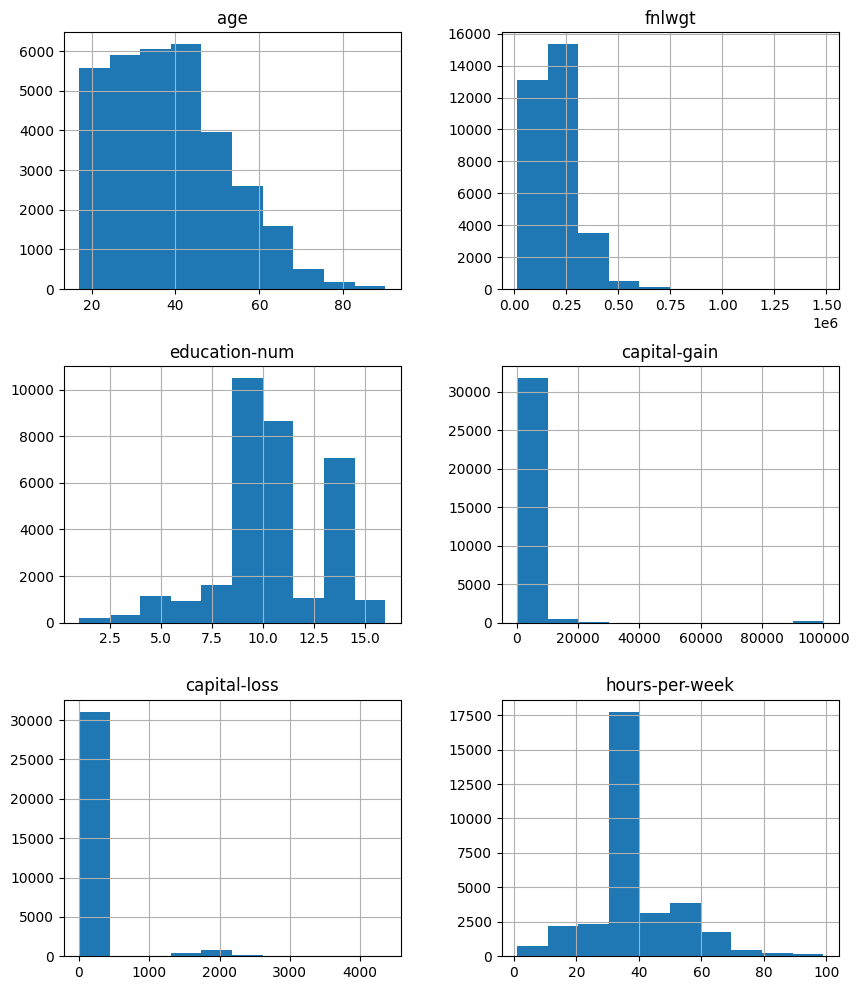

In [19]:
# Plotting histogram for numerical attributes
numerical_attributes = data.select_dtypes(include=('int'))
numerical_attributes.hist(figsize=(10,12))

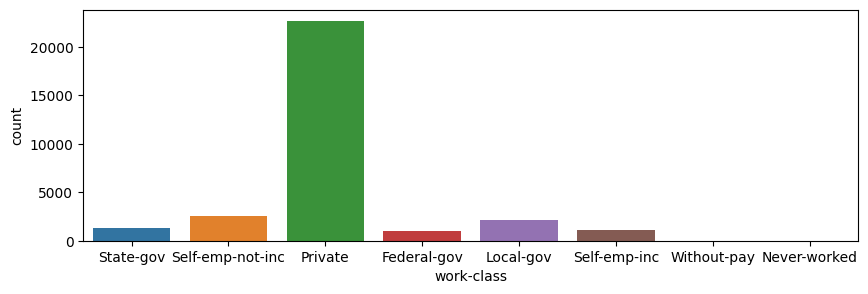

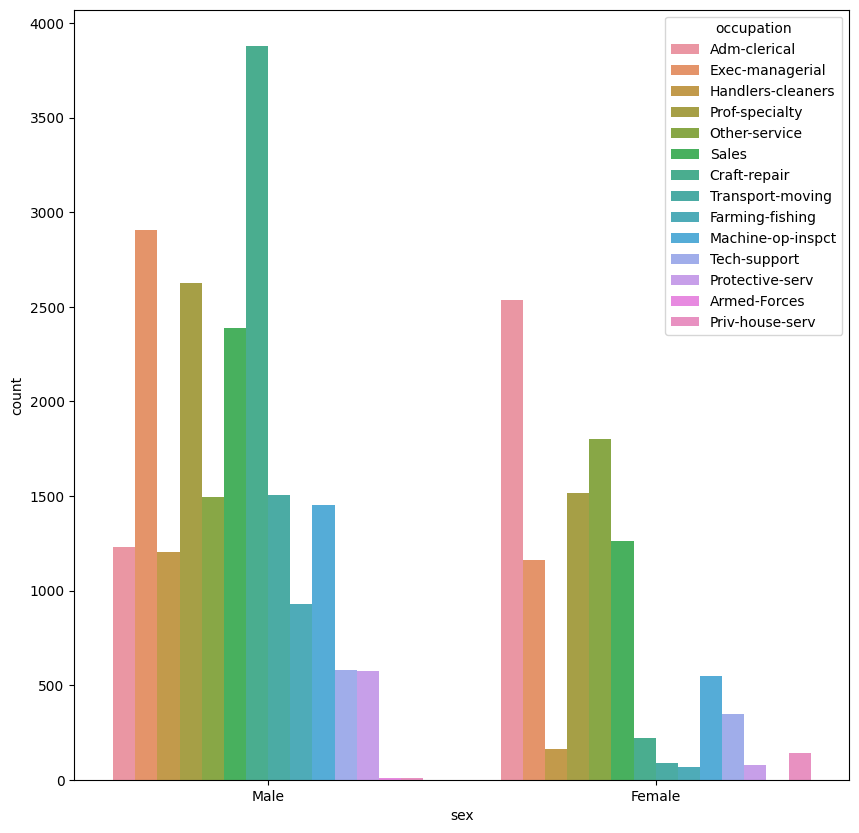

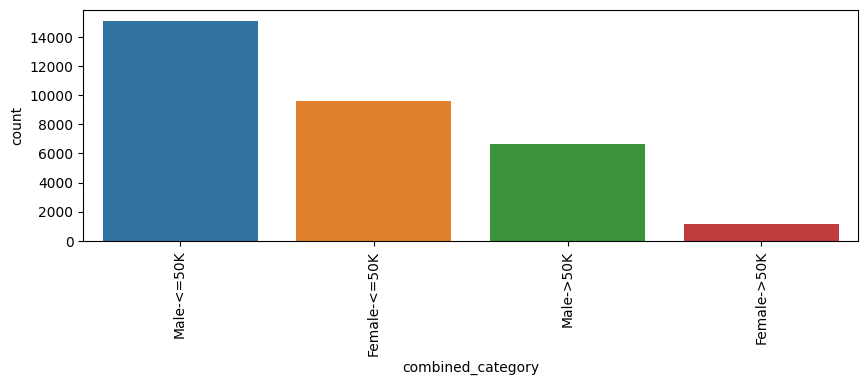

In [41]:
# Plotting count_plot for categorical values
categorical_attributes = data.select_dtypes(include=('object'))

# Plotting one categorical value
# Work-class Count plot
plt.figure(figsize=(10,3))
sns.countplot(data = categorical_attributes, x  = "work-class")

# Plotting with 2 combined categorical values
plt.figure(figsize=(10,10))
sns.countplot(x='sex', hue='occupation', data = categorical_attributes)


# Plotting with 2 or more combined categorical values
# Assuming df is your DataFrame
# Combine two categorical columns into one
data['combined_category'] = data['sex'].astype(str) + "-" + data['income'].astype(str)
plt.figure(figsize=(10,3))
sns.countplot(x='combined_category', data=data)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()




<Axes: xlabel='education', ylabel='count'>

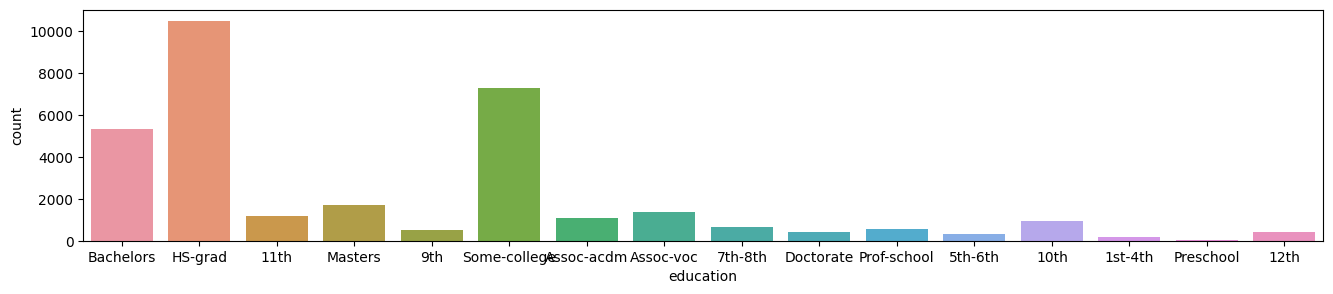

In [42]:
plt.figure(figsize=(16,3))
sns.countplot(data = data, x = 'education')

<Axes: xlabel='sex', ylabel='count'>

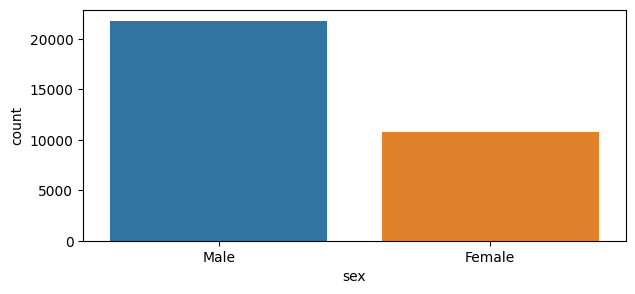

In [45]:
# Sex Count Plot
plt.figure(figsize=(7,3))
sns.countplot(data = data, x = 'sex')

<Axes: xlabel='income', ylabel='count'>

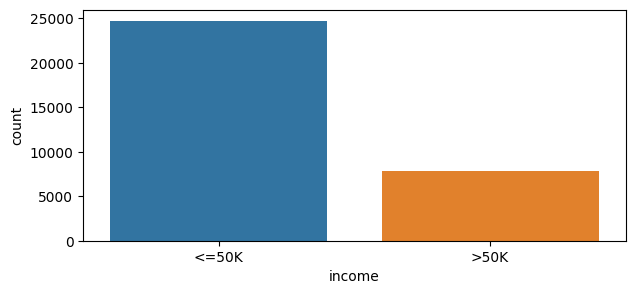

In [47]:
# Income Count Plot
plt.figure(figsize=(7,3))
sns.countplot(data = data, x = 'income')